# DOTE6756BB-Machine Learning Individual Project

### Dataset Description

| Category | Features |
| --- | --- |
| **Target variable (classification)** | `action_type` - Decisions made by the delivery-men (PICKUP/DELIVERY)  |
| **Target variable (regression)** | `expected_use_time` -  Expected time of the deliery-man's next action |
| **Demographic** | `courier_id`, `wave_index`, `tracking_id`, `date`, `group`, `id` |
| **Geographic Information** | `courier_wave_start_lng`, `courier_wave_start_lat`, `target_lng`, `target_lat` |
| **Courier Information** | `level`, `speed`, `max_load` |
| **Courier's Previous Action Information** | `source_type`, `source_tracking_id`, `source_lng`, `source_lat` |
| **Others** | - `weather_grade` - Weather condition <br> - `aoi_id` - Area of Interest (i.e. delivery destination) <br> - `shop_id` - Shop ID <br> - `grid_distance` - Shortest Travel Distance (provided by GPS) <br> - `hour` - The hour in the day <br> - `urgency` - How urgent the order is |

### Part 1: Data Loading and Exploration

#### Import libraries

In [2]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### Load dataset

In [3]:
df_train = pd.read_csv('../Data/dataframe_train.csv')
df_test = pd.read_csv('../Data/dataframe_test.csv')

In [4]:
df_train.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,date,group,level,speed,...,source_type,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
0,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,ASSIGN,2.100070e+18,121.630997,39.142343,121.632547,39.141946,377.0,804,1246,11
1,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.632547,39.141946,121.626144,39.140281,780.0,298,1246,11
2,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,DELIVERY,2.100070e+18,121.626144,39.140281,121.631219,39.141811,550.0,545,2462,11
3,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.631219,39.141811,121.632084,39.146201,707.0,341,1205,11
4,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,DELIVERY,2.100070e+18,121.632084,39.146201,121.631574,39.142231,770.0,166,1882,11


In [5]:
# check data types and non-null counts
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509604 entries, 0 to 509603
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   courier_id              509604 non-null  int64  
 1   wave_index              509604 non-null  int64  
 2   tracking_id             509604 non-null  float64
 3   courier_wave_start_lng  509604 non-null  float64
 4   courier_wave_start_lat  509604 non-null  float64
 5   action_type             509604 non-null  object 
 6   date                    509604 non-null  int64  
 7   group                   509604 non-null  float64
 8   level                   509604 non-null  int64  
 9   speed                   509604 non-null  float64
 10  max_load                509604 non-null  int64  
 11  weather_grade           509604 non-null  object 
 12  aoi_id                  509604 non-null  object 
 13  shop_id                 509604 non-null  object 
 14  id                  

In [6]:
df_train.describe()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,id,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
count,5.096040e+05,509604.000000,5.096040e+05,509604.000000,509604.000000,5.096040e+05,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000
mean,8.151255e+07,2.400154,2.100076e+18,121.534935,39.179724,2.020022e+07,1.496302e+17,2.607338,5.348056,8.980295,254801.500000,2.100076e+18,121.534923,39.179897,121.534882,39.179971,1078.274900,441.655107,1572.033695,14.482592
std,4.903781e+07,2.168523,4.797124e+12,0.151081,0.114737,7.776252e+00,1.333406e+17,0.698855,0.626070,2.028490,147110.147627,4.797965e+12,0.150718,0.113594,0.150752,0.113615,1124.569317,405.080785,4344.556228,3.310272
min,1.000787e+07,0.000000,2.100070e+18,119.876654,36.064995,2.020020e+07,2.020020e+16,0.000000,3.008735,1.000000,0.000000,2.100070e+18,119.876654,36.064995,121.059274,38.826421,0.000000,1.000000,-340771.000000,6.000000
25%,1.069734e+07,1.000000,2.100070e+18,121.444628,39.116955,2.020021e+07,2.020020e+16,2.000000,4.868302,8.000000,127400.750000,2.100070e+18,121.444174,39.117340,121.444254,39.117201,330.000000,189.000000,859.000000,12.000000
50%,1.117511e+08,2.000000,2.100080e+18,121.523819,39.162378,2.020022e+07,2.020020e+17,3.000000,5.458097,9.000000,254801.500000,2.100080e+18,121.523930,39.161311,121.523587,39.161241,869.000000,354.000000,1752.000000,14.000000
75%,1.187608e+08,4.000000,2.100080e+18,121.591983,39.218092,2.020022e+07,2.020020e+17,3.000000,5.779434,10.000000,382202.250000,2.100080e+18,121.591344,39.218011,121.591347,39.218921,1572.000000,584.000000,2590.000000,17.000000
max,1.259969e+08,16.000000,2.100080e+18,122.256382,39.705013,2.020023e+07,2.020020e+18,3.000000,6.943103,19.000000,509603.000000,2.100080e+18,122.260124,39.705013,122.260124,39.695211,429173.000000,9246.000000,11345.000000,23.000000


### Part 2： Exploratory Data Analysis (EDA)

#### Target Variable Distribution

Target Variable (action_type) distribution
action_type
PICKUP      254802
DELIVERY    254802
Name: count, dtype: int64

Pick-up Rate: 50.0%


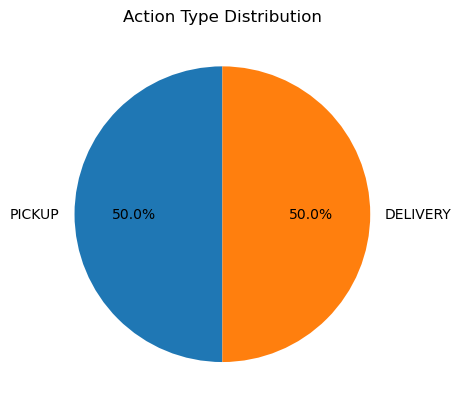

In [7]:
print('Target Variable (action_type) distribution')
print(df_train['action_type'].value_counts())
print(f'\nPick-up Rate: {df_train['action_type'].value_counts(normalize=True)['PICKUP'] * 100:.1f}%')

# Plot pie chart for action_type distribution
df_train['action_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Action Type Distribution')
plt.ylabel('')
plt.show()

**Observation:** The dataset is **balanced**

#### Numerical Features Distribution

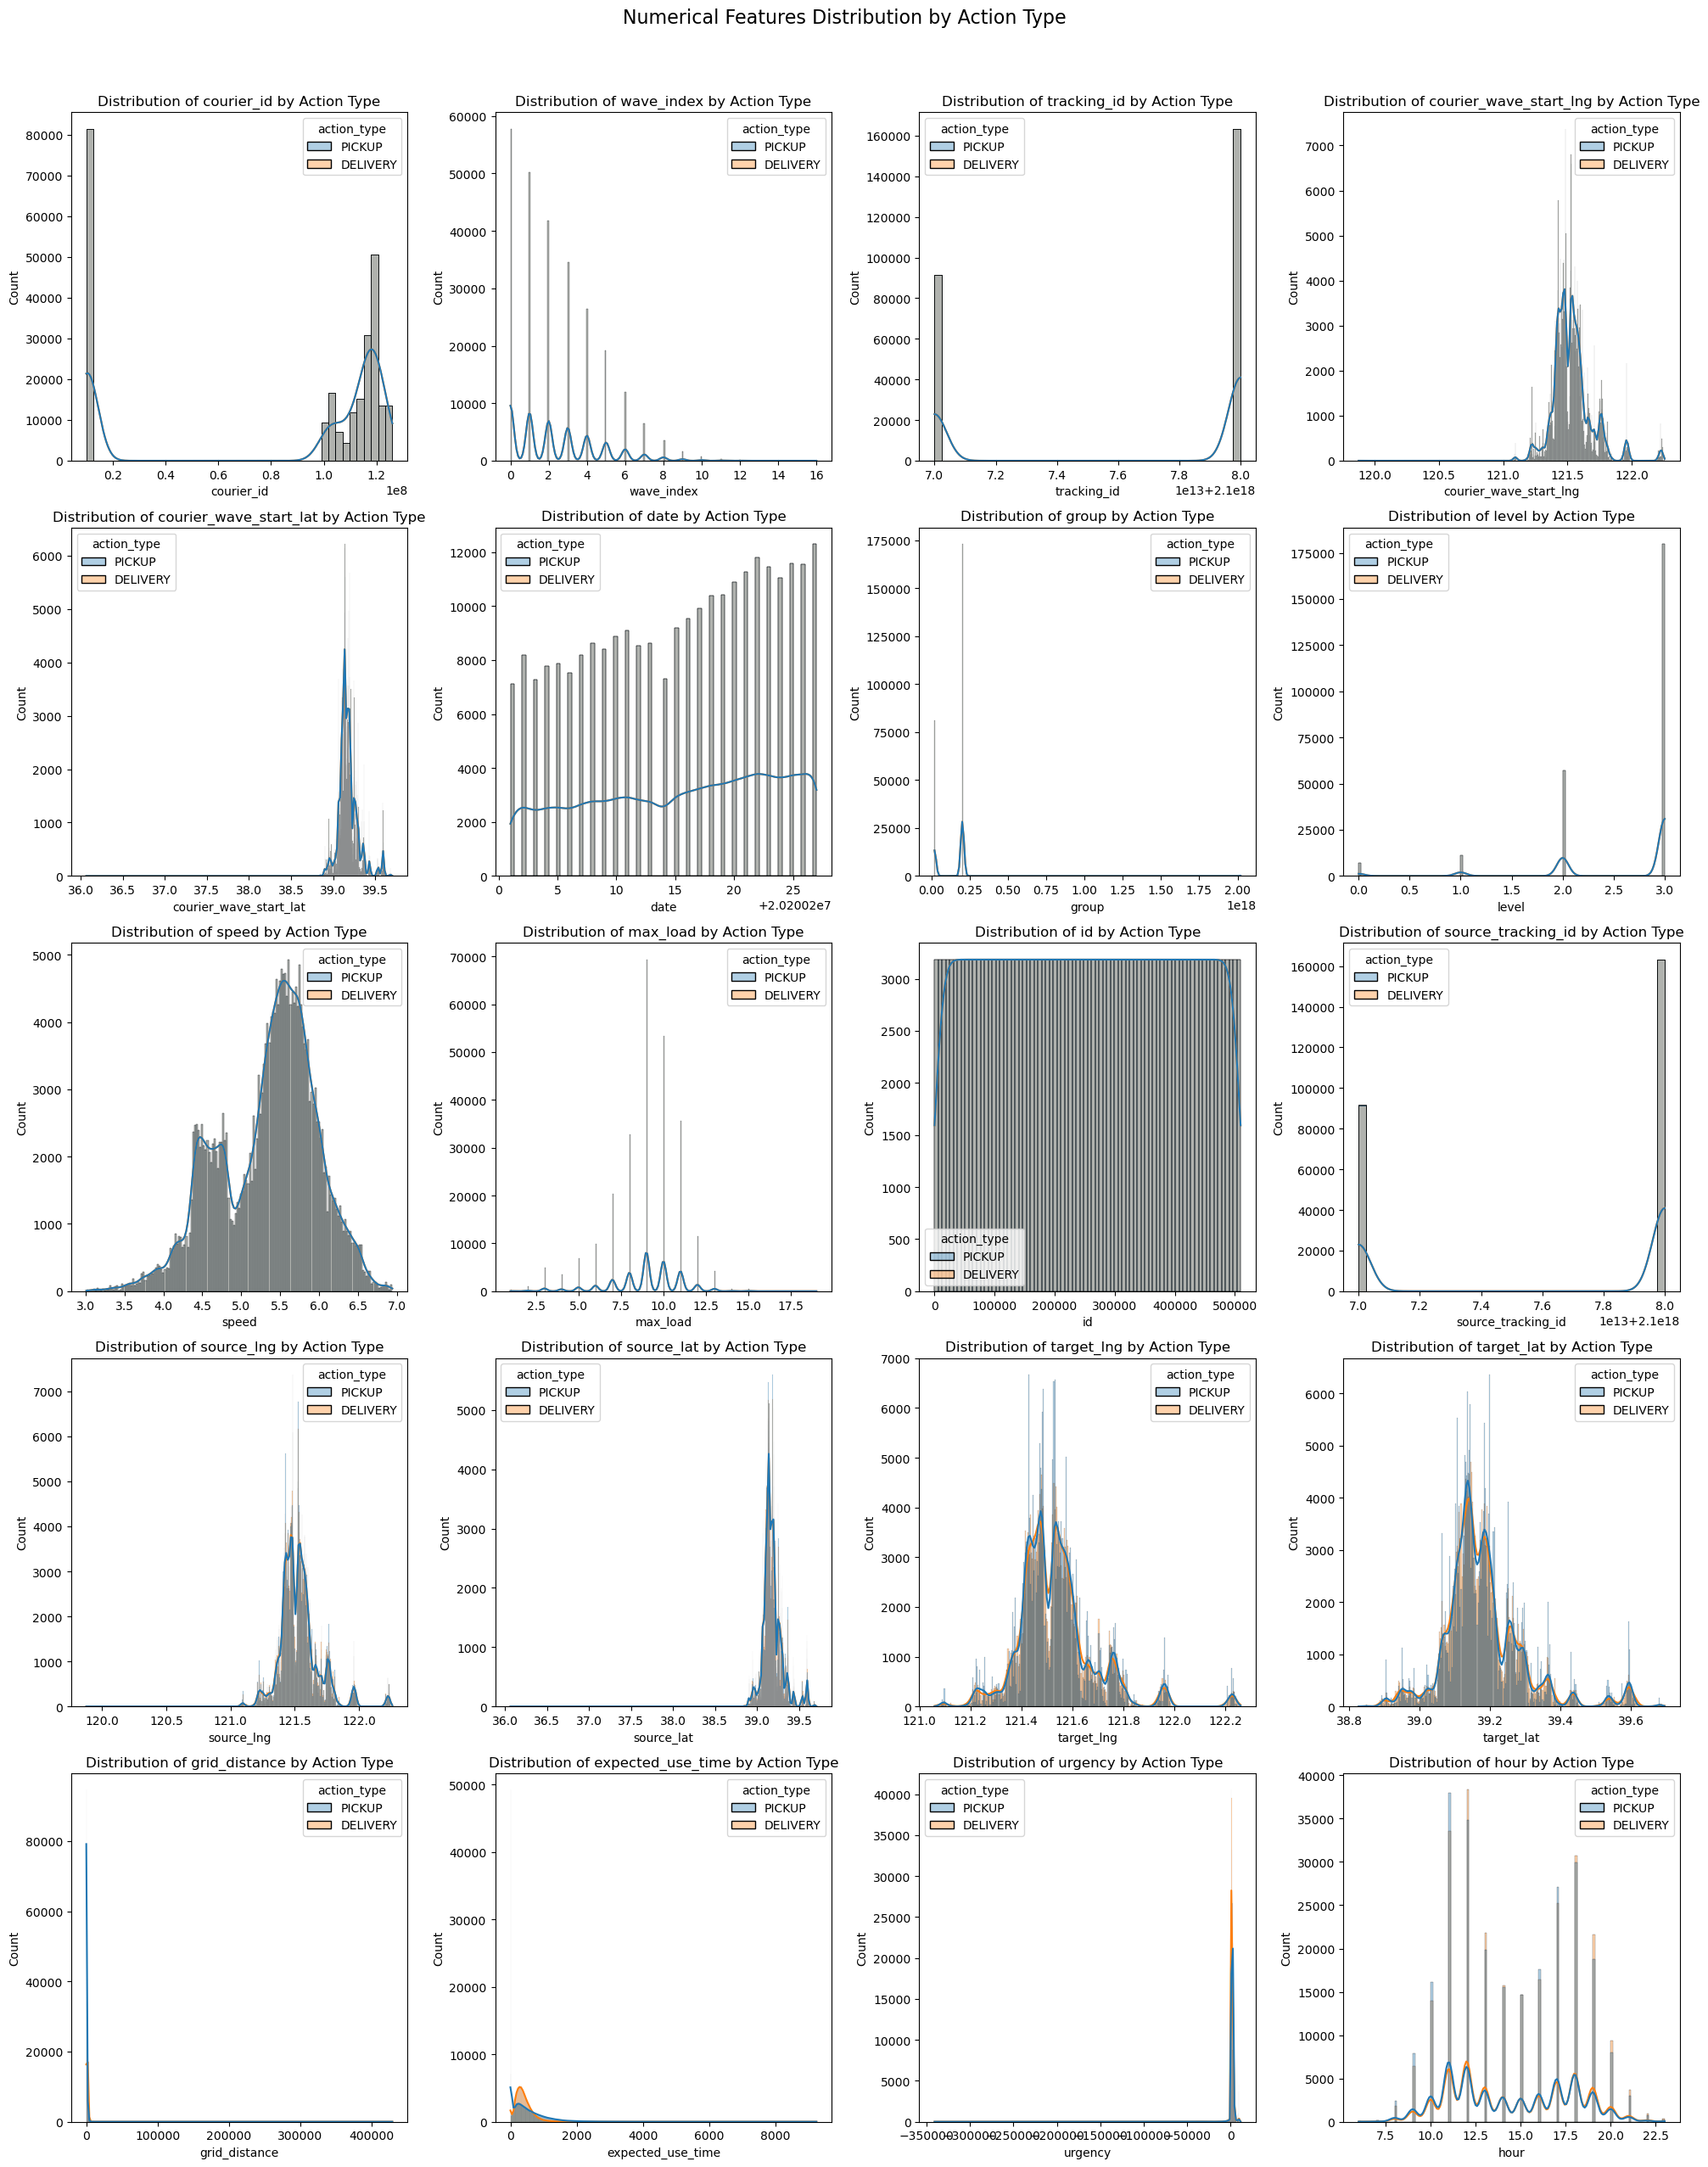

In [39]:
# Visualize distributions of all numerical features
fig2, axes2 = plt.subplots(nrows=len(numerical_cols)//4, ncols=4, figsize=(20, 5*len(numerical_cols)//4))
axes2 = axes2.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_train,
        x=col,
        hue='action_type',
        kde=True,
        alpha=0.35,
        multiple='layer',
        
        ax=axes2[i]
    )
    axes2[i].set_title(f'Distribution of {col} by Action Type')

plt.suptitle('Numerical Features Distribution by Action Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Categorical Features Analysis

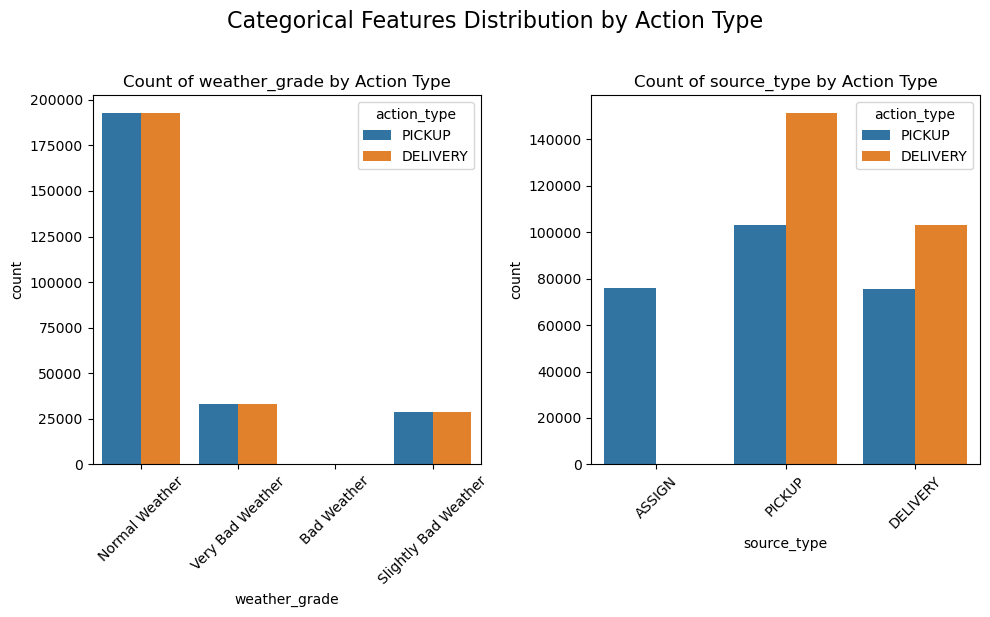

In [14]:
# Visualize categorical 
# Identify categorical columns (excluding IDs and target if not needed)
categorical_cols = ['weather_grade', 'source_type']

# Visualize distributions of categorical features
fig3, axes3 = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(10, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_train,
        x=col,
        hue='action_type',
        ax=axes3[i] if len(categorical_cols) > 1 else axes3
    )
    axes3[i].set_title(f'Count of {col} by Action Type')
    axes3[i].tick_params(axis='x', rotation=45)

plt.suptitle('Categorical Features Distribution by Action Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Key Observations:**
- **weather_grade**: 

### Part 3: Data Preprocessing